In [1]:
import numpy as np
import pickle
from disco_functions import *
from efp_loader import *
from matplotlib import pyplot as plt

In [2]:
with open("/het/p4/ranit/data/mlist_test.txt", "rb") as fp:
    m_test = np.asarray(pickle.load(fp))
with open("/het/p4/ranit/data/mlist_train.txt", "rb") as fp:
    m_train = np.asarray(pickle.load(fp))
with open("/het/p4/ranit/data/mlist_val.txt", "rb") as fp:
    m_val = np.asarray(pickle.load(fp))     


with open("/het/p4/ranit/data/pTlist_train.txt", "rb") as fp:
    pt_train = np.asarray(pickle.load(fp))
with open("/het/p4/ranit/data/pTlist_val.txt", "rb") as fp:
    pt_val = np.asarray(pickle.load(fp))
with open("/het/p4/ranit/data/pTlist_test.txt", "rb") as fp:
    pt_test = np.asarray(pickle.load(fp))
    
    
with open("/het/p4/ranit/data/y_train.txt", "rb") as fp:
    y_train = np.asarray(pickle.load(fp))
with open("/het/p4/ranit/data/y_val.txt", "rb") as fp:
    y_val = np.asarray(pickle.load(fp))
with open("/het/p4/ranit/data/y_test.txt", "rb") as fp:
    y_test = np.asarray(pickle.load(fp))

In [3]:
efp_train, efp_val,_ = efp_loader([4436, 4491, 3407, 1500, 4303, 2063])

(1210999, 6)
(402999, 6)
(403998, 6)


In [4]:
mpt_train_ = np.transpose(np.vstack((m_train,pt_train)))
mpt_val_ = np.transpose(np.vstack((m_val,pt_val)))

with open('/het/p4/ranit/data/top_wmass.txt','rb') as fp:
    wmass = pickle.load(fp)


mpt_train = np.hstack((mpt_train_,wmass['train'].reshape(-1,1)))
mpt_val = np.hstack((mpt_val_,wmass['val'].reshape(-1,1)))

In [5]:
alldata = stack_data(first=mpt_train, x=mpt_val)

(1613998, 3)


In [6]:
ydisco = stack_data(first=y_train,x=y_val)

(1613998, 1)


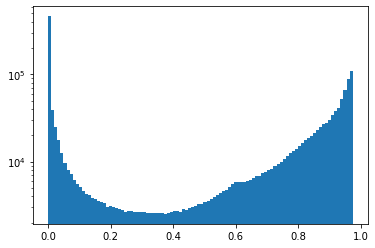

In [8]:
ypred = np.load('./temp/ypred_batch/ypred_batch_0_c4_efps_32_32.npy')

plt.hist(ypred,bins=100)
plt.yscale('log')
plt.show()

In [39]:
def disco_minibatches(vector1,vector2,minibatch_split):
    dis_cor = []
    for indices in minibatch_split:
        vector_1_mini_batch = vector1[indices]
        vector_2_mini_batch = vector2[indices]
        dis = dcor.distance_correlation_af_inv(vector_1_mini_batch,vector_2_mini_batch)
        dis_cor.append(dis)
    return np.array(dis_cor)

In [45]:
len(discos)

788

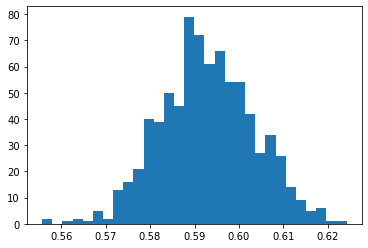

In [44]:
plt.hist(discos,bins=30)
plt.show()

In [38]:
#disco_mini_batch(ydisco,ypred,minibatches)

0.8260649681810491

In [48]:
np.mean(discos)-1.5*np.std(discos)

0.5771076247689516

In [9]:
#thresh = 0.1
for thresh in [0.1,0.2,0.3,0.4,0.5]:
    ydisco_cut = ydisco[(ypred>0.5-thresh)&(ypred<0.5+thresh)]
    alldata_cut = alldata[(ypred>0.5-thresh)&(ypred<0.5+thresh)]

    minibatches = mini_batch_splitter(ydisco_cut,2048)
    disco = disco_mini_batch(ydisco_cut,alldata_cut,minibatches)
    print(disco)

0.040829417201204914
0.06262279127685741
0.11083277024233078
0.1893280947858189
0.5928480707018311


In [12]:
for thresh in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]:
    ydisco_cut = ydisco[(ypred>thresh)&(ypred<thresh+0.2)]
    alldata_cut = alldata[(ypred>thresh)&(ypred<thresh+0.2)]

    minibatches = mini_batch_splitter(ydisco_cut,2048)
    disco = disco_mini_batch(ydisco_cut,alldata_cut,minibatches)
    print(disco)

0.16456032447568786
0.04226003427736366
0.03845561392734258
0.044888000721751774
0.040829417201204914
0.038684954778816644
0.04035091790744542
0.04655655303477642
0.07748159963399671


In [11]:
for thresh in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]:
    ydisco_cut = ydisco[(ypred>thresh)&(ypred<thresh+0.3)]
    alldata_cut = alldata[(ypred>thresh)&(ypred<thresh+0.3)]

    minibatches = mini_batch_splitter(ydisco_cut,2048)
    disco = disco_mini_batch(ydisco_cut,alldata_cut,minibatches)
    print(disco)

0.20401277342696927
0.05426005972707013
0.04847306713537318
0.05390450328909289
0.044447238359916444
0.04802951797105889
0.05639788930277028
0.09773655136164654


In [10]:
for thresh in [0,0.1,0.2,0.3,0.4,0.5,0.6]:
    ydisco_cut = ydisco[(ypred>thresh)&(ypred<thresh+0.4)]
    alldata_cut = alldata[(ypred>thresh)&(ypred<thresh+0.4)]

    minibatches = mini_batch_splitter(ydisco_cut,2048)
    disco = disco_mini_batch(ydisco_cut,alldata_cut,minibatches)
    print(disco)

0.24210356428744026
0.07641317433632748
0.07293300789437226
0.06262279127685741
0.05752665278684216
0.06859046899791434
0.1124903564432089


In [56]:
thresh=0.2
np.count([np.argwhere((ypred>0.5-thresh)&(ypred<0.5+thresh)).flatten()]

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])